# Question 2 : Binary Classification Using AdaLine Algorithm


<ul>
<li>The first category has 100 (x,y) points such that $x \sim \mathcal{N}(\mu = 2,\sigma^{2} = 0.25)\, 
$ and $y \sim \mathcal{N}(\mu = 0,\sigma^{2} = 0.04)\,$.</li>
<li>The second category has 30 (x,y) points such that $x \sim \mathcal{N}(\mu = 0,\sigma^{2} = 0.01)\, 
$ and $y \sim \mathcal{N}(\mu = 1,\sigma^{2} = 0.49)\,$.</li>
</ul>


## Tasks

<ul>
<li>Part A : Train the Neural Network using AdaLine Algorithm that can seperate these two categories. Plot the changes in the error ${(t-net)}^{2}/2$.</li>
<li>Part B : Is AdaLine Algorithm good for seperating the two categories? If not, give a better solution.</li>
</ul>

## Adaptive Linear Unit (AdaLine)
![](images/Q2-AdaLineArch.png)

## Learning Algorithm for AdaLine
![](images/Q2-LearningRule.png)
![](images/Q2-LearningAlgorithm.png)

## Making the Data

In [121]:
import numpy as np
import pandas as pd

In [122]:
x1 = np.random.normal(2, 0.5, 100).reshape(-1,1)
y1 = np.random.normal(0, 0.2, 100).reshape(-1,1)
A = pd.DataFrame(np.concatenate((x1, y1), axis=1), columns=['x','y'])
A['label'] = 0

x2 = np.random.normal(0, 0.1, 30).reshape(-1,1)
y2 = np.random.normal(1, 0.7, 30).reshape(-1,1)
B = pd.DataFrame(np.concatenate((x2, y2), axis=1), columns=['x','y'])
B['label'] = 1

df = pd.concat([A,B], axis = 0)

In [123]:
df

,x,y,label
0,2.271872,-0.154809,0
1,1.692285,-0.071956,0
2,1.401097,0.144817,0
3,3.070829,-0.051153,0
4,1.952689,0.169984,0
...,...,...,...
25,-0.169182,0.595206,1
26,0.065680,0.904998,1
27,-0.143590,0.444546,1
28,-0.118327,0.742085,1


## Plotting the Dataset

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

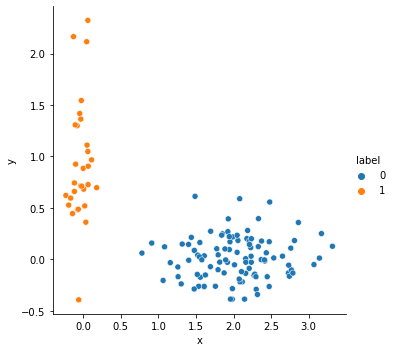

In [125]:
sns.relplot(x="x", y="y", hue="label", data=df);

As you can see, these 2 categories are linearly separable.

## Implementation

In [181]:
class AdaLineNetwork() :
    
    def __init__(self, in_features, out_features, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.out_features = out_features
        # Initialize Weights & Biases
        self.init_wad()
        
    # Initialize Weights & Biases
    def init_wad(self) :
        self.weights = np.random.randint(low = -2,high = 2, size = in_features*out_features).reshape(out_features,-1)
        self.biases = np.random.randint(low = -2,high = 2, size = out_features)
        #Learning Rate
        self.lr = 0.1
        
    
    def forward(self, x) :
        net = np.matmul(self.weights,x)+self.biases
        target = np.sign(np.matmul(self.weights,x)+self.biases)
        return target,net
    
    def backward(self,t, net, xi) :
        self.weights = self.weights + self.lr*(t-net)*xi
        self.biases = self.biases + self.lr*(t-net)
        
    def train(self,df,epochs = 1) :
        error_per_epoch = []
        for epoch in range(0,epochs):
            # Evaluate
            error_per_epoch.append(self.evaluate(df))
            
            for index, row in df.iterrows():
                # Forward Propagation
                t,net = self.forward(row[['x','y']].values)
                # Backpropagation
                self.backward(t,net,row[['x','y']].values)
        
        return error_per_epoch
                
    def calc_error(self,target,net) :
        return (np.square(target-net)/2)
    
    def evaluate(self,df) :
        error = 0
        for index, row in df.iterrows():
            #Forward Propagation
            t,net = self.forward(row[['x','y']].values)
            error += model.calc_error(t,net)[0]
        
        return error

## Intializing the model

This is a binary classification problem. So we need only 1 output neuron.

In [192]:
in_features = 2
out_features = 1
model = AdaLineNetwork(in_features, out_features)
print(model.weights)
print(model.biases)

[[0 1]]
[-2]


# Part A

## Training

In [193]:
epochs_ = 10
loss_per_epoch = model.train(df, epochs = epochs_)

### Plot the loss function

In [194]:
loss_per_epoch

[54.54210617216965,
 1.1951623375931228,
 0.19932916748361265,
 0.029710074034804815,
 0.0043044750602946585,
 0.0006210596467865315,
 8.955562020451168e-05,
 1.2912695403642317e-05,
 1.861812786615959e-06,
 2.684444426235351e-07]

Text(0.5, 0, 'epoch')

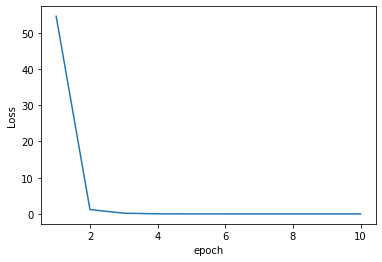

In [195]:
plt.plot(range(1,epochs_+1), loss_per_epoch)
plt.ylabel('Loss')
plt.xlabel('epoch')

As you cna see After 4 epochs our model learns the weights and bias of the separator line.

## Plotting the separator line
Let's plot the separator line that our model learned.

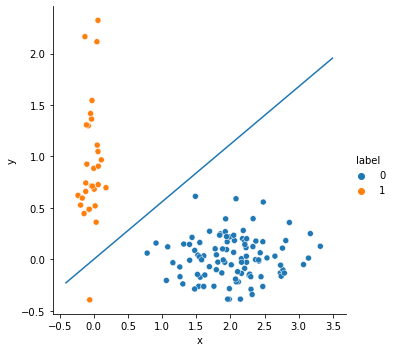

In [196]:
sns.relplot(x="x", y="y", hue="label", data=df)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')


slope = (model.weights[0][0]/model.weights[0][1])

intercept = (model.biases[0]/model.weights[0][1])

abline(slope,0)
# model.biases

## Part B

Our AdaLine model does regression good enough.